In [1]:
from sklearn import datasets

# How are we going to use evaluate the performance? 
# 1. accuracy
from sklearn import metrics
# 2. f1 score 
from sklearn.metrics import f1_score

# Machine learning models 

# Linear Regression 
# url : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# SVM
# url: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm

# KNN 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
# url: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# Random Forest 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Logistic Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

# PCA 
from sklearn.decomposition import PCA 

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.model_selection import learning_curve

from sklearn.metrics import classification_report

# Preprocessing

In [2]:
total_dep_score = pd.read_csv('../data/0&1/total_panic_score.csv')

X_t = total_dep_score.copy()
del X_t['panic_score']

y_t = total_dep_score['panic_score']

In [3]:
y_t.value_counts() 

0.0    2983
1.0      60
Name: panic_score, dtype: int64

In [4]:
2983 / (2983 + 60) 

0.9802826158396319

In [5]:
print(X_t)
print(y_t)

      comp_week  comp_wend  text_week  text_wend  tv_week  tv_wend
0             2          2          1          1        2        2
1             2          1          1          1        2        3
2             3          3          3          1        2        2
3             1          2          1          1        1        2
4             2          3          0          0        2        2
...         ...        ...        ...        ...      ...      ...
3038          3          3          2          2        2        3
3039          2          3          1          1        1        2
3040          0          0          0          0        2        0
3041          2          3          1          1        1        2
3042          1          2          2          2        0        1

[3043 rows x 6 columns]
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3038    0.0
3039    0.0
3040    0.0
3041    0.0
3042    0.0
Name: panic_score, Length: 3043, dtype:

In [6]:
sampled_dep_score = pd.read_csv('../data/0&1/sampled_panic_score.csv')

X_s = sampled_dep_score.copy()
del X_s['panic_score']

y_s = sampled_dep_score['panic_score']

In [7]:
y_s.value_counts()

0.0    60
1.0    60
Name: panic_score, dtype: int64

In [8]:
print(X_s)
print(y_s)

     comp_week  comp_wend  text_week  text_wend  tv_week  tv_wend
0            2          2          1          1        2        2
1            1          1          2          3        0        2
2            2          2          0          0        2        3
3            3          3          0          0        2        2
4            1          2          2          2        3        2
..         ...        ...        ...        ...      ...      ...
115          1          1          1          2        0        2
116          3          2          1          1        3        3
117          1          2          2          2        2        2
118          1          2          1          1        2        2
119          2          2          3          3        3        3

[120 rows x 6 columns]
0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
115    1.0
116    0.0
117    1.0
118    0.0
119    0.0
Name: panic_score, Length: 120, dtype: float64


## SVM

## Seed == 100

In [9]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [10]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)     

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 0.001, 'gamma': 0.0001, 'kernel': 'linear'}
Accuracy: 0.9780941949616648
F1 score micro: 0.9780941949616648
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       893
         1.0       0.00      0.00      0.00        20

    accuracy                           0.98       913
   macro avg       0.49      0.50      0.49       913
weighted avg       0.96      0.98      0.97       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


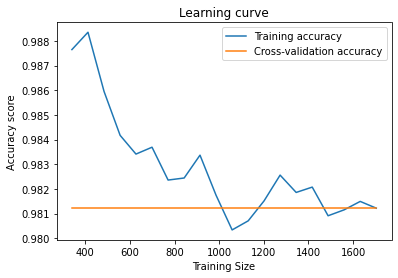

In [11]:
plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed == 1234

In [12]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [13]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)     

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 0.001, 'gamma': 0.0001, 'kernel': 'linear'}
Accuracy: 0.9868565169769989
F1 score micro: 0.9868565169769989
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       901
         1.0       0.00      0.00      0.00        12

    accuracy                           0.99       913
   macro avg       0.49      0.50      0.50       913
weighted avg       0.97      0.99      0.98       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


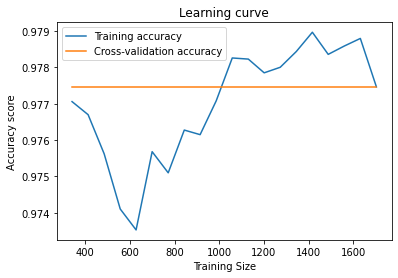

In [14]:
plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed == 500

In [15]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [16]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)     

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 0.001, 'gamma': 0.0001, 'kernel': 'linear'}
Accuracy: 0.9813800657174151
F1 score micro: 0.9813800657174151
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       896
         1.0       0.00      0.00      0.00        17

    accuracy                           0.98       913
   macro avg       0.49      0.50      0.50       913
weighted avg       0.96      0.98      0.97       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


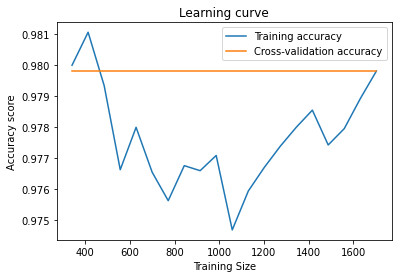

In [17]:
plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [18]:
# learning curve considering different seeds 

In [19]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

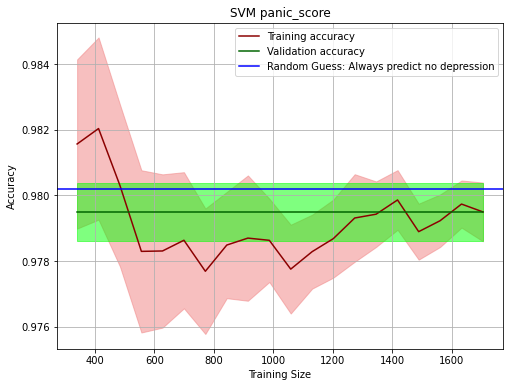

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM panic_score')
ax.axhline(y=0.9802, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

## Logistic Regression

## Seed 100

In [21]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [22]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.0001, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9780941949616648
F1 score micro: 0.9780941949616648
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       893
         1.0       0.00      0.00      0.00        20

    accuracy                           0.98       913
   macro avg       0.49      0.50      0.49       913
weighted avg       0.96      0.98      0.97       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.98122066        nan 0.98122066 0.98122066
 0.98122066 0.98122066 0.98122066 0.98122066        nan        nan
        nan        nan        nan 0.98122066 0.98122066        nan
 0.98122066 0.98122066        nan        nan 0.98122066        nan
 0.98122066 0.98122066 0.98122066 0.98122066 0.98122066 0.98122066
        nan        nan        nan        nan        nan 0.98122066
 0.98122066        nan 0.98122066 0.98122066        nan        nan
        nan        nan 0.98122066 0.98122066 0.98122066        nan
 0.98122066 0.98122066        nan        nan        nan        nan
        nan 0.98122066 0.98122066        nan 0.98122066 0.98122066
        nan        nan 0.98122066        nan 0.98122066 0.98122066
 0.98122066 0.98122066 0.98122066 0.98122066        nan        nan
        nan        n

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


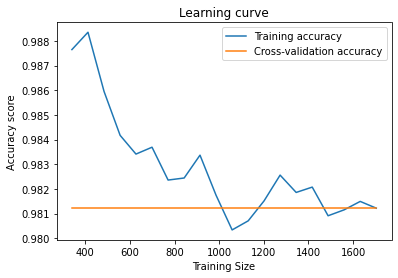

In [23]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [24]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [25]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.0001, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9868565169769989
F1 score micro: 0.9868565169769989
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       901
         1.0       0.00      0.00      0.00        12

    accuracy                           0.99       913
   macro avg       0.49      0.50      0.50       913
weighted avg       0.97      0.99      0.98       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.97746479        nan 0.97746479 0.97746479
 0.97746479 0.97746479 0.97746479 0.97746479        nan        nan
        nan        nan        nan 0.97746479 0.97746479        nan
 0.97746479 0.97746479        nan        nan 0.97746479        nan
 0.97746479 0.97746479 0.97746479 0.97746479 0.97746479 0.97746479
        nan        nan        nan        nan        nan 0.97746479
 0.97746479        nan 0.97746479 0.97746479        nan        nan
        nan        nan 0.97746479 0.97746479 0.97746479        nan
 0.97746479 0.97746479        nan        nan        nan        nan
        nan 0.97746479 0.97746479        nan 0.97746479 0.97746479
        nan        nan 0.97746479        nan 0.97746479 0.97746479
 0.97746479 0.97746479 0.97746479 0.97746479        nan        nan
        nan        n

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s


[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


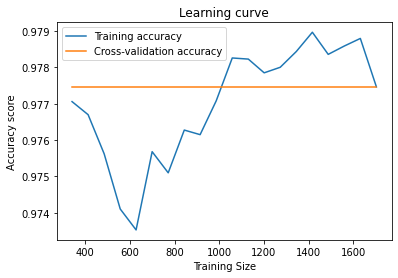

In [26]:
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [27]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [28]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.0001, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9813800657174151
F1 score micro: 0.9813800657174151
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       896
         1.0       0.00      0.00      0.00        17

    accuracy                           0.98       913
   macro avg       0.49      0.50      0.50       913
weighted avg       0.96      0.98      0.97       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.97981221        nan 0.97981221 0.97981221
 0.97981221 0.97981221 0.97981221 0.97981221        nan        nan
        nan        nan        nan 0.97981221 0.97981221        nan
 0.97981221 0.97981221        nan        nan 0.97981221        nan
 0.97981221 0.97981221 0.97981221 0.97981221 0.97981221 0.97981221
        nan        nan        nan        nan        nan 0.97981221
 0.97981221        nan 0.97981221 0.97981221        nan        nan
        nan        nan 0.97981221 0.97981221 0.97981221        nan
 0.97981221 0.97981221        nan        nan        nan        nan
        nan 0.97981221 0.97981221        nan 0.97981221 0.97981221
        nan        nan 0.97981221        nan 0.97981221 0.97981221
 0.97981221 0.97981221 0.97981221 0.97981221        nan        nan
        nan        n

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


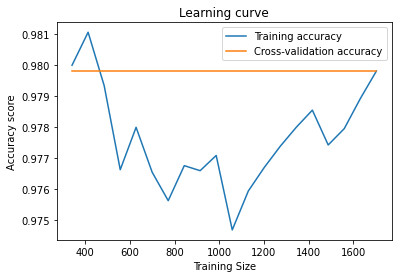

In [29]:
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [30]:
# learning curve considering different seeds 

In [31]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

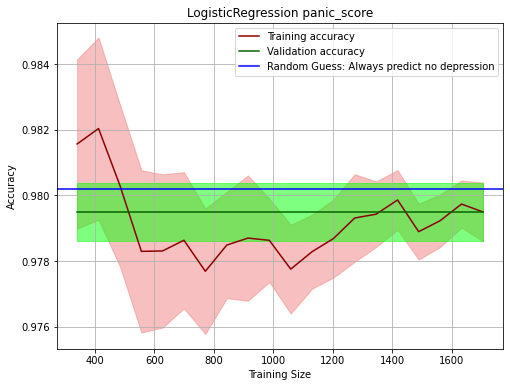

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('LogisticRegression panic_score')
ax.axhline(y=0.9802, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

## KNN

## Seed 100

In [33]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [34]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int),
                        'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier()

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
best hyper parameters {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 0.9780941949616648
F1 score micro: 0.9780941949616648
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       893
         1.0       0.00      0.00      0.00        20

    accuracy                           0.98       913
   macro avg       0.49      0.50      0.49       913
weighted avg       0.96      0.98      0.97       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished


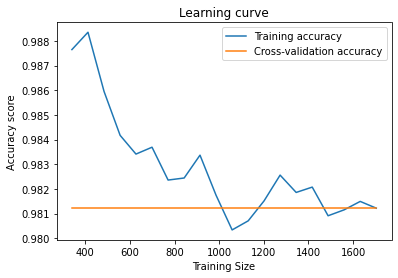

In [35]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=12, weights='uniform', n_neighbors=18)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [36]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [37]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int),
                        'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier()

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
best hyper parameters {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 0.9868565169769989
F1 score micro: 0.9868565169769989
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       901
         1.0       0.00      0.00      0.00        12

    accuracy                           0.99       913
   macro avg       0.49      0.50      0.50       913
weighted avg       0.97      0.99      0.98       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.7s finished


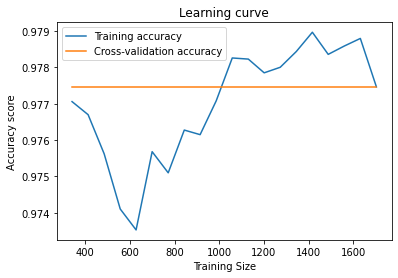

In [38]:
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=56, weights='uniform', n_neighbors=18)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [39]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [40]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int),
                        'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier()

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
best hyper parameters {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.9791894852135816
F1 score micro: 0.9791894852135816
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       896
         1.0       0.00      0.00      0.00        17

    accuracy                           0.98       913
   macro avg       0.49      0.50      0.49       913
weighted avg       0.96      0.98      0.97       913



[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished


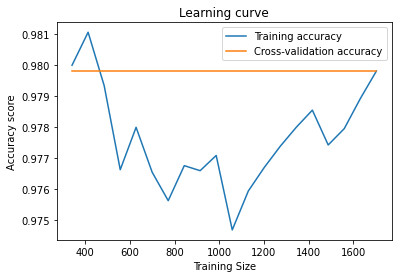

In [41]:
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=2, weights='uniform', n_neighbors=18)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [42]:
# learning curve considering different seeds 

In [43]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

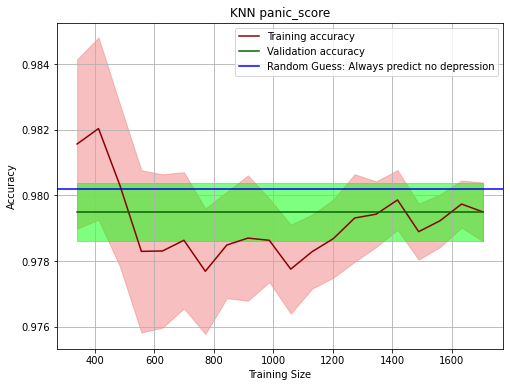

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('KNN panic_score')
ax.axhline(y=0.9802, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

## Random Forest

## Seed 100

In [45]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [46]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)    

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 5}
Accuracy: 0.9780941949616648
F1 score micro: 0.9780941949616648
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       893
         1.0       0.00      0.00      0.00        20

    accuracy                           0.98       913
   macro avg       0.49      0.50      0.49       913
weighted avg       0.96      0.98      0.97       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


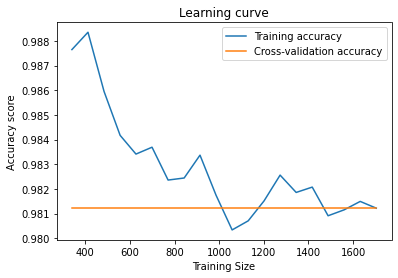

In [47]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=2, max_features='auto', min_samples_leaf=2, min_samples_split=2, n_estimators=5)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [48]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [49]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)    

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 5}
Accuracy: 0.9868565169769989
F1 score micro: 0.9868565169769989
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       901
         1.0       0.00      0.00      0.00        12

    accuracy                           0.99       913
   macro avg       0.49      0.50      0.50       913
weighted avg       0.97      0.99      0.98       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished


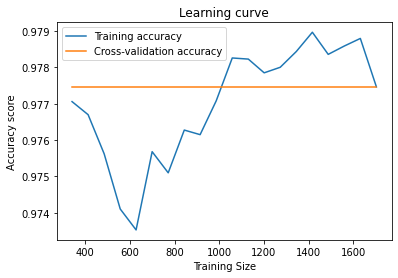

In [50]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=2, max_features='auto', min_samples_leaf=2, min_samples_split=2, n_estimators=5)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [51]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [52]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)    

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 38, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 5}
Accuracy: 0.9813800657174151
F1 score micro: 0.9813800657174151
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       896
         1.0       0.00      0.00      0.00        17

    accuracy                           0.98       913
   macro avg       0.49      0.50      0.50       913
weighted avg       0.96      0.98      0.97       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished


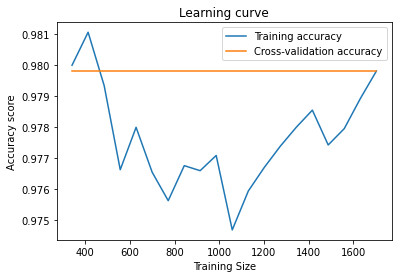

In [53]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=2, max_features='auto', min_samples_leaf=2, min_samples_split=2, n_estimators=5)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [54]:
# learning curve considering different seeds 

In [55]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

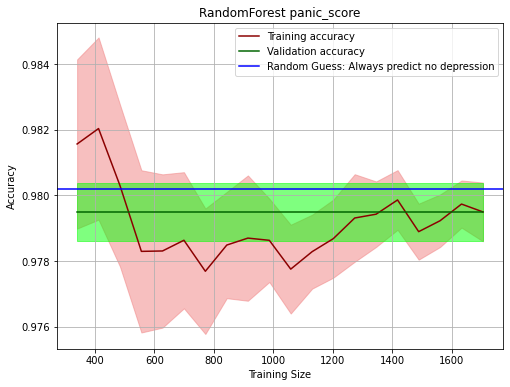

In [56]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('RandomForest panic_score')
ax.axhline(y=0.9802, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

# 2. sampled

# SVM 

## Seed 100

In [57]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [58]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 10.0, 'gamma': 0.1, 'kernel': 'poly'}
Accuracy: 0.5833333333333334
F1 score micro: 0.5833333333333334
F1 score binary: 0.5454545454545455

classification report:
               precision    recall  f1-score   support

         0.0       0.63      0.60      0.62        20
         1.0       0.53      0.56      0.55        16

    accuracy                           0.58        36
   macro avg       0.58      0.58      0.58        36
weighted avg       0.59      0.58      0.58        36



[learning_curve] Training set sizes: [13 16 19 21 24 27 30 33 35 38 41 44 47 50 52 55 58 61 64 67]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  13 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


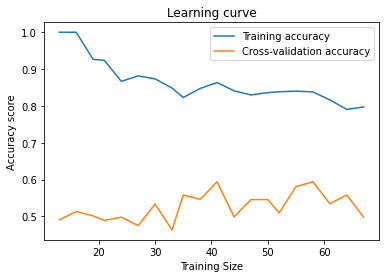

In [59]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = svm.SVC(kernel='poly', C=10, gamma=0.1)


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [60]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [61]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 10.0, 'gamma': 0.0001, 'kernel': 'linear'}
Accuracy: 0.4722222222222222
F1 score micro: 0.4722222222222222
F1 score binary: 0.45714285714285713

classification report:
               precision    recall  f1-score   support

         0.0       0.50      0.47      0.49        19
         1.0       0.44      0.47      0.46        17

    accuracy                           0.47        36
   macro avg       0.47      0.47      0.47        36
weighted avg       0.47      0.47      0.47        36



[learning_curve] Training set sizes: [13 16 19 21 24 27 30 33 35 38 41 44 47 50 52 55 58 61 64 67]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


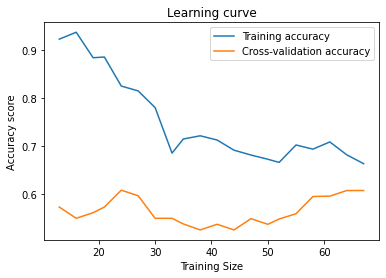

In [62]:
plot_model = svm.SVC(kernel='linear', C=10, gamma=0.0001)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [63]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [64]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 10.0, 'gamma': 0.1, 'kernel': 'poly'}
Accuracy: 0.5277777777777778
F1 score micro: 0.5277777777777778
F1 score binary: 0.48484848484848486

classification report:
               precision    recall  f1-score   support

         0.0       0.50      0.65      0.56        17
         1.0       0.57      0.42      0.48        19

    accuracy                           0.53        36
   macro avg       0.54      0.53      0.52        36
weighted avg       0.54      0.53      0.52        36



[learning_curve] Training set sizes: [13 16 19 21 24 27 30 33 35 38 41 44 47 50 52 55 58 61 64 67]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


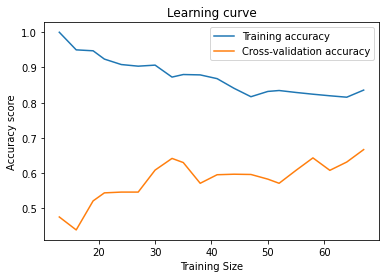

In [65]:
plot_model = svm.SVC(kernel='poly', C=10, gamma=0.1)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [66]:
# learning curve considering different seeds 

In [67]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

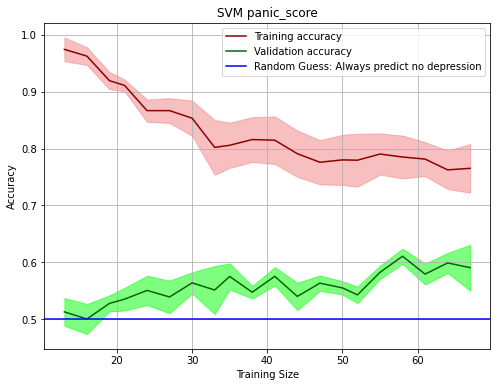

In [68]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM panic_score')
ax.axhline(y=0.5, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

# Logistic Regression

## Seed 100

In [69]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [70]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.0001, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.4444444444444444
F1 score micro: 0.4444444444444444
F1 score binary: 0.6153846153846153

classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        20
         1.0       0.44      1.00      0.62        16

    accuracy                           0.44        36
   macro avg       0.22      0.50      0.31        36
weighted avg       0.20      0.44      0.27        36



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.47573529        nan 0.46544118 0.46544118
 0.46544118 0.46544118 0.46544118 0.46544118        nan        nan
        nan        nan        nan 0.49044118 0.49044118        nan
 0.49044118 0.49044118        nan        nan 0.47573529        nan
 0.46544118 0.46544118 0.46544118 0.46544118 0.46544118 0.46544118
        nan        nan        nan        nan        nan 0.49044118
 0.49044118        nan 0.49044118 0.49044118        nan        nan
        nan        nan 0.52426471 0.46544118 0.46544118        nan
 0.46544118 0.46544118        nan        nan        nan        nan
        nan 0.49044118 0.49044118        nan 0.49044118 0.49044118
        nan        nan 0.47573529        nan 0.44044118 0.46544118
 0.46544118 0.47720588 0.46544118 0.46544118        nan        nan
        nan        n

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [13 16 19 21 24 27 30 33 35 38 41 44 47 50 52 55 58 61 64 67]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


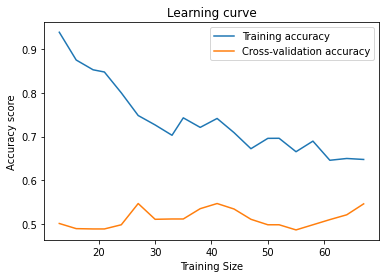

In [71]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=10.001, multi_class='ovr', penalty='l1', solver='saga')


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [72]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [73]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.0001, 'multi_class': 'auto', 'penalty': 'none', 'solver': 'newton-cg'}
Accuracy: 0.4722222222222222
F1 score micro: 0.4722222222222222
F1 score binary: 0.45714285714285713

classification report:
               precision    recall  f1-score   support

         0.0       0.50      0.47      0.49        19
         1.0       0.44      0.47      0.46        17

    accuracy                           0.47        36
   macro avg       0.47      0.47      0.47        36
weighted avg       0.47      0.47      0.47        36



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.48602941        nan 0.43897059 0.38014706
 0.38014706 0.38014706 0.38014706 0.38014706        nan        nan
        nan        nan        nan 0.5625     0.5625            nan
 0.5625     0.5625            nan        nan 0.48602941        nan
 0.39191176 0.38014706 0.38014706 0.38014706 0.38014706 0.38014706
        nan        nan        nan        nan        nan 0.5625
 0.5625            nan 0.5625     0.5625            nan        nan
        nan        nan 0.45073529 0.38014706 0.38014706        nan
 0.38014706 0.38014706        nan        nan        nan        nan
        nan 0.5625     0.5625            nan 0.5625     0.5625
        nan        nan 0.48602941        nan 0.45073529 0.38014706
 0.38014706 0.38014706 0.38014706 0.38014706        nan        nan
        nan        nan      

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [13 16 19 21 24 27 30 33 35 38 41 44 47 50 52 55 58 61 64 67]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


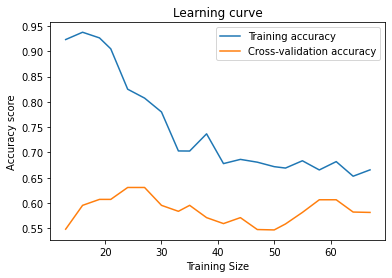

In [74]:
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='none', solver='newton-cg')

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [75]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [76]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.0001, 'multi_class': 'auto', 'penalty': 'none', 'solver': 'newton-cg'}
Accuracy: 0.6388888888888888
F1 score micro: 0.6388888888888888
F1 score binary: 0.6060606060606061

classification report:
               precision    recall  f1-score   support

         0.0       0.59      0.76      0.67        17
         1.0       0.71      0.53      0.61        19

    accuracy                           0.64        36
   macro avg       0.65      0.65      0.64        36
weighted avg       0.66      0.64      0.63        36



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.5125            nan 0.46397059 0.45367647
 0.44117647 0.42867647 0.45367647 0.42867647        nan        nan
        nan        nan        nan 0.64338235 0.64338235        nan
 0.63161765 0.61985294        nan        nan 0.5125            nan
 0.44191176 0.45367647 0.44117647 0.42867647 0.45367647 0.42867647
        nan        nan        nan        nan        nan 0.64338235
 0.64338235        nan 0.63161765 0.61985294        nan        nan
        nan        nan 0.45367647 0.45367647 0.45367647        nan
 0.45367647 0.45367647        nan        nan        nan        nan
        nan 0.64338235 0.64338235        nan 0.64338235 0.63161765
        nan        nan 0.5125            nan 0.4875     0.45367647
 0.45367647 0.42867647 0.45367647 0.45367647        nan        nan
        nan        n

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [13 16 19 21 24 27 30 33 35 38 41 44 47 50 52 55 58 61 64 67]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


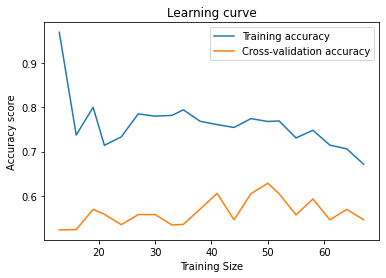

In [77]:
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='none', solver='newton-cg')

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [78]:
# learning curve considering different seeds 

In [79]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

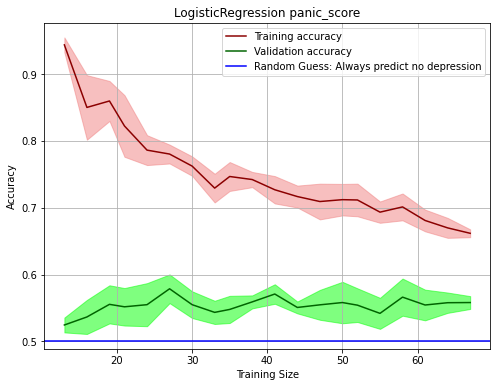

In [80]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('LogisticRegression panic_score')
ax.axhline(y=0.5, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

# KNN

## Seed 100

In [81]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [82]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int),
                        'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier()

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
best hyper parameters {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 12, 'weights': 'distance'}
Accuracy: 0.5555555555555556
F1 score micro: 0.5555555555555556
F1 score binary: 0.5555555555555556

classification report:
               precision    recall  f1-score   support

         0.0       0.62      0.50      0.56        20
         1.0       0.50      0.62      0.56        16

    accuracy                           0.56        36
   macro avg       0.56      0.56      0.56        36
weighted avg       0.57      0.56      0.56        36



[learning_curve] Training set sizes: [13 16 19 21 24 27 30 33 35 38 41 44 47 50 52 55 58 61 64 67]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


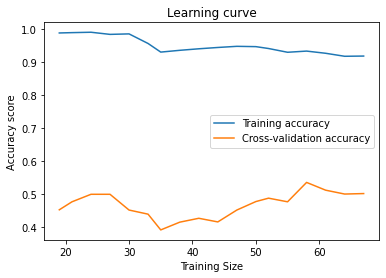

In [83]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, weights='distance', n_neighbors=18)


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [84]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [85]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int),
                        'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier()

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
best hyper parameters {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 12, 'weights': 'uniform'}
Accuracy: 0.5833333333333334
F1 score micro: 0.5833333333333334
F1 score binary: 0.5161290322580646

classification report:
               precision    recall  f1-score   support

         0.0       0.59      0.68      0.63        19
         1.0       0.57      0.47      0.52        17

    accuracy                           0.58        36
   macro avg       0.58      0.58      0.58        36
weighted avg       0.58      0.58      0.58        36



[learning_curve] Training set sizes: [13 16 19 21 24 27 30 33 35 38 41 44 47 50 52 55 58 61 64 67]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


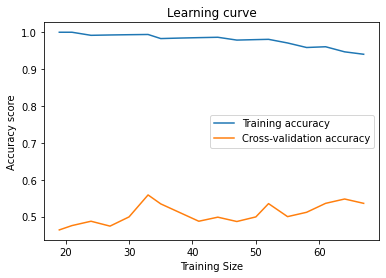

In [86]:
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=12, weights='distance', n_neighbors=18)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [87]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [88]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int),
                        'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier()

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
best hyper parameters {'algorithm': 'auto', 'leaf_size': 12, 'n_neighbors': 12, 'weights': 'distance'}
Accuracy: 0.5277777777777778
F1 score micro: 0.5277777777777778
F1 score binary: 0.5142857142857142

classification report:
               precision    recall  f1-score   support

         0.0       0.50      0.59      0.54        17
         1.0       0.56      0.47      0.51        19

    accuracy                           0.53        36
   macro avg       0.53      0.53      0.53        36
weighted avg       0.53      0.53      0.53        36



[learning_curve] Training set sizes: [13 16 19 21 24 27 30 33 35 38 41 44 47 50 52 55 58 61 64 67]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


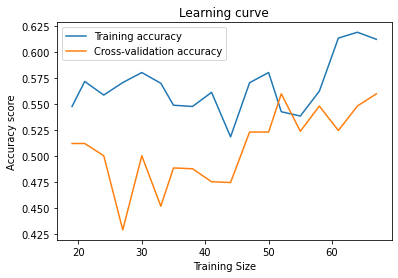

In [89]:
plot_model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=12, weights='uniform', n_neighbors=18)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [90]:
# learning curve considering different seeds

In [91]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

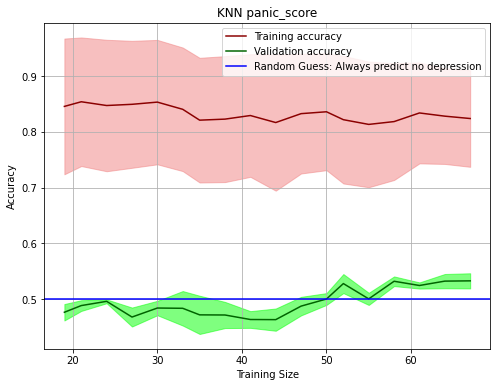

In [92]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('KNN panic_score')
ax.axhline(y=0.5, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

# Random Forest

## Seed 100

In [93]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [94]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1) 

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': True, 'criterion': 'gini', 'max_depth': 26, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 5}
Accuracy: 0.5555555555555556
F1 score micro: 0.5555555555555556
F1 score binary: 0.4666666666666667

classification report:
               precision    recall  f1-score   support

         0.0       0.59      0.65      0.62        20
         1.0       0.50      0.44      0.47        16

    accuracy                           0.56        36
   macro avg       0.55      0.54      0.54        36
weighted avg       0.55      0.56      0.55        36



[learning_curve] Training set sizes: [13 16 19 21 24 27 30 33 35 38 41 44 47 50 52 55 58 61 64 67]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


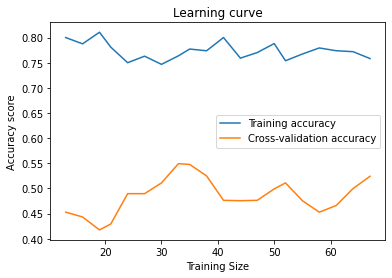

In [95]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=38, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=5)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [96]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [97]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1) 

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 27}
Accuracy: 0.5555555555555556
F1 score micro: 0.5555555555555556
F1 score binary: 0.5555555555555555

classification report:
               precision    recall  f1-score   support

         0.0       0.59      0.53      0.56        19
         1.0       0.53      0.59      0.56        17

    accuracy                           0.56        36
   macro avg       0.56      0.56      0.56        36
weighted avg       0.56      0.56      0.56        36



[learning_curve] Training set sizes: [13 16 19 21 24 27 30 33 35 38 41 44 47 50 52 55 58 61 64 67]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


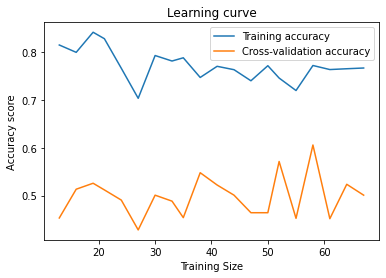

In [98]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=14, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=5)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [99]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [100]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1) 

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 26, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 5}
Accuracy: 0.5277777777777778
F1 score micro: 0.5277777777777778
F1 score binary: 0.5405405405405405

classification report:
               precision    recall  f1-score   support

         0.0       0.50      0.53      0.51        17
         1.0       0.56      0.53      0.54        19

    accuracy                           0.53        36
   macro avg       0.53      0.53      0.53        36
weighted avg       0.53      0.53      0.53        36



[learning_curve] Training set sizes: [13 16 19 21 24 27 30 33 35 38 41 44 47 50 52 55 58 61 64 67]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished


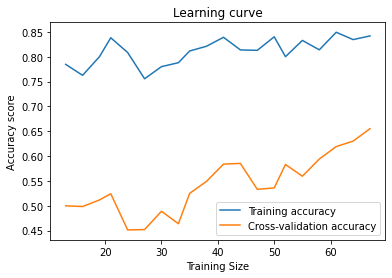

In [101]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=14, max_features='log2', min_samples_leaf=2, min_samples_split=2, n_estimators=16)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [102]:
# learning curve considering different seeds

In [103]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

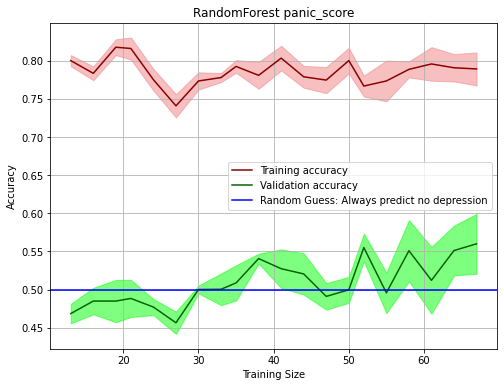

In [104]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('RandomForest panic_score')
ax.axhline(y=0.5, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()